# Hidden 1D Fractal Interpolation 

In one dimensional hidden fractal interpolation, the data is assumed to be given in the form 
$$
P = \{(x_i, y_i, z_i) ~|~ x_i, y_i, z_i \in \mathbb{R}, \quad i = 1, 2, \ldots, N \}
$$
where $N$ is the number of points. The aim sof the interpolation is to find a continuous function $f: \mathbb{R} \mapsto \mathbb{R}^2$ such that $f(x_i) = [x_i, y_i]$. 



Note that $f$ is a vector valued function. Let $f$ be decomposed into two functions $f_1 : \mathbb{R} \mapsto \mathbb{R}$ and $f_2 : \mathbb{R} \mapsto \mathbb{R}$. In this case, the one can consider the interpolation of data points 
$$
P_1 = \{ (x_i, y_i ) ~|~ x_i, y_i \in \mathbb{R}, \quad i = 1, 2, \ldots, N \}
$$
Then the variables $z_i$ can be thought of as free dimension. Thus, given that we have a set of points $P_1$ and want to find and interpolant $f_1(x_i) = y_i$, instead of trying to find $f_1$ directly, we can go up one dimension by transforming out data set from $\mathbb{P}_1$ to $\mathbb{P}$, find and interpolant $f$ and project the interpolant $f$ back to one dimension to find $f_1$.



The steps to solve this problem is very similar to the case in one dimensional fractal interpolation. (so, the reader may refer to the fractal interpolation notebook for furhter detail). In the case of hidden fractal interpolation, however, the dimension is increaded which implies the transformation of the IFS also change. 

Again we divide the interpolation domain $I = [x_0, x_N]$ into to subintervals $I_n  \{x_{n -1}, x_{n}\}$ such that $I = \cup_{i = 1}^N I_n$. The transformations $w_n$ of the IFS takes the form 
$$
w_n(x, y, z) = 
\begin{bmatrix}
    a_{11, n} & 0 & 0 \\ 
    a_{12, n} & a_{22, n} & a_{23, n} \\ 
    a_{31, n} & a_{32, n} & a_{33, n}
\end{bmatrix}
\begin{bmatrix}
    x \\ y \\ z 
\end{bmatrix} + 
\begin{bmatrix}
    b_{1, n} \\ 
    b_{2, n} \\ 
    b_{3, n}
\end{bmatrix}, \quad n = 1, 2, \ldots, N 
$$
Then, the it can be shown thath the interpolant $f$ is the fixed point of  functional mapping $\mathcal{M}[f](x) = F_n(L_n^{-1}(x), f(L_n^{-1}(x)))$, i.e. $f = \lim_{n \mapsto \infty} T^n[f]$, where, 
$$
\begin{aligned}
    L_n(x) &= a_{11, n}x + b_{1, n} \\ 
    F_n(x, y, z) &= \begin{bmatrix} 
        a_{21, n} & a_{22, n} & a_{23, n} \\ 
        a_{31, n} & a_{32, n} & a_{33, n} \\ 
    \end{bmatrix}
    \begin{bmatrix}
        x \\ y \\ z 
    \end{bmatrix} + 
    \begin{bmatrix}
        b_{2, n} \\ 
        b_{3, n}
    \end{bmatrix}
\end{aligned}
$$

Here, the unknown coefficients of the transformation $w_n$ can be found using the boundary conditons, 
$$
\begin{aligned}
    w_n(x_0, y_0) &= (x_{n - 1}, y_{n - 1}, z_{n - 1}) \\ 
    w_n(x_N, y_N) &= (x_{n}, y_{n}, z_{n})
\end{aligned}
$$

Thus, we have, 
$$
\begin{aligned}
    a_{11, n} x_0 + b_{1, n} &= x_{n - 1} \\ 
     a_{11, n} x_N + b_{1, n} &= x_{n} \\ 
\end{aligned}
$$
$$
\begin{aligned}
    a_{21, n} x_0 + b_{2, n} &= y_{n - 1} - a_{22, n} y_0 - a_{23, n} z_0 \\ 
     a_{21, n} x_N + b_{2, n} &= y_{n} - a_{22, n} y_N - a_{23, n} z_N  \\ 
\end{aligned}
$$
$$
\begin{aligned}
    a_{31, n} x_0 + b_{3, n} &= z_{n - 1} - a_{32, n} y_0 - a_{33, n} z_0 \\ 
     a_{31, n} x_N + b_{3, n} &= z_{n} - a_{32, n} y_N - a_{33, n} z_N  \\ 
\end{aligned}
$$


The above equation system may be written in the following form, 
$$
\begin{bmatrix}
    x_0 & 1 \\ 
    x_N & 1 
\end{bmatrix}
\begin{bmatrix}
    a_{11, n} & a_{21, n} & a_{31, n} \\ 
    b_{1, n} & b_{2,n} & b_{3, n}
\end{bmatrix}
= 
\begin{bmatrix} 
x_{n - 1} & y_{n - 1} - a_{22, n} y_0 - a_{23,n} z_0 & z_{n - 1} - a_{32, n} y_0 - a_{33, n} z_0 \\ 
x_{n} & y_{n} - a_{22,n}y_n - a_{23,n} z_N & z_{n} - a_{32, n}y_N - a_{33,n} z_N 
\end{bmatrix}

$$

## Application 

In this section, we will apply the theoretical analysis presented in the previous section. 

### Regular Data Interpolation 

In this subsection, we will interpolate some regular data drawn from a smooth function. Below is the script for onte dimensional hidden fractal interpolation.

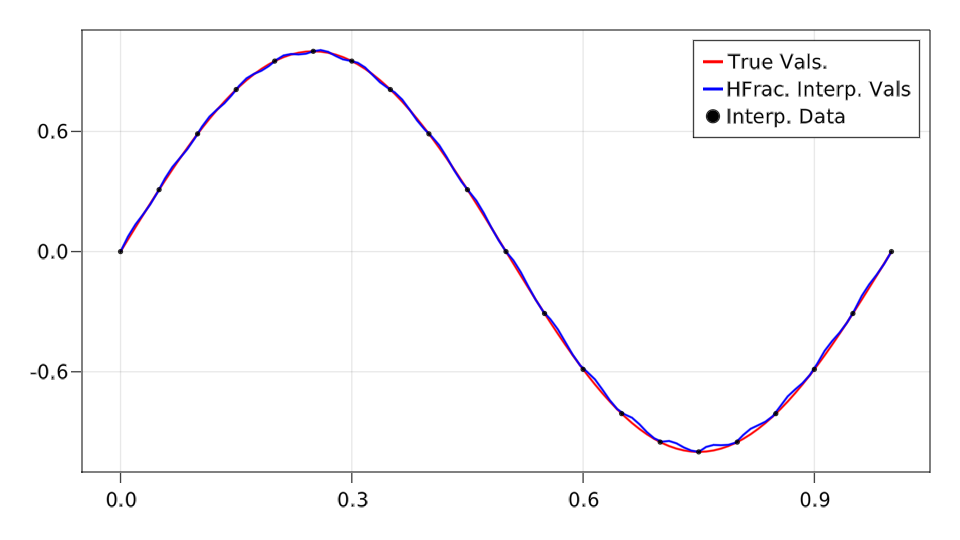

In [3]:
# Load the libraries 
using FractalTools 
using Makie 

# Construct a data set 
npts = 21                           # Number of data samples. 
f(x) = [                            # The function to be sampled for data
    FractalTools.sinusoid(x), 
    FractalTools.parabol(x)
    ]           
domain = [[0.], [1.]]               # Interpolation domaion I = [0, 1]
pts = getdata(f, domain, npts)      # Interpolation data 

# Construct interpolate 
freevar = 0.01                                  # Free variable
interp = interpolate(pts, HInterp1D(freevar * ones(2,2)))    # Interpolant 

# Construct test data 
ntpts = 5 * npts                    # Number of test data
tpts = getdata(domain, ntpts)       # Test data 

# Evaluate the interpolation 
xt = getindex.(tpts, 1)
truevals = getindex.(f.(xt), 1)          # True values 
interpvals = getindex.(interp.(xt), 1)   # Interpolation values 

# Plots 
fig = Figure() 
fig, ax, plt = lines(xt, truevals, linewidth=2, color=:red, label="True Vals.") 
lines!(xt, interpvals, linewidth=2, color=:blue, label="HFrac. Interp. Vals")
scatter!(pts, color=:black, markersize=3, label="Interp. Data")
axislegend(ax)
fig 

### Irregular Data Interpolation 

In this subsection, we will interpolate irregular data that is drawn from a nowhere differntiable function. Note from the figure from the script below that the fractal interpolant reflects irregular structure of the data. This feature of fractal interpolation makes it natural candidates for the interpolation of data that has inherent irregularities. 

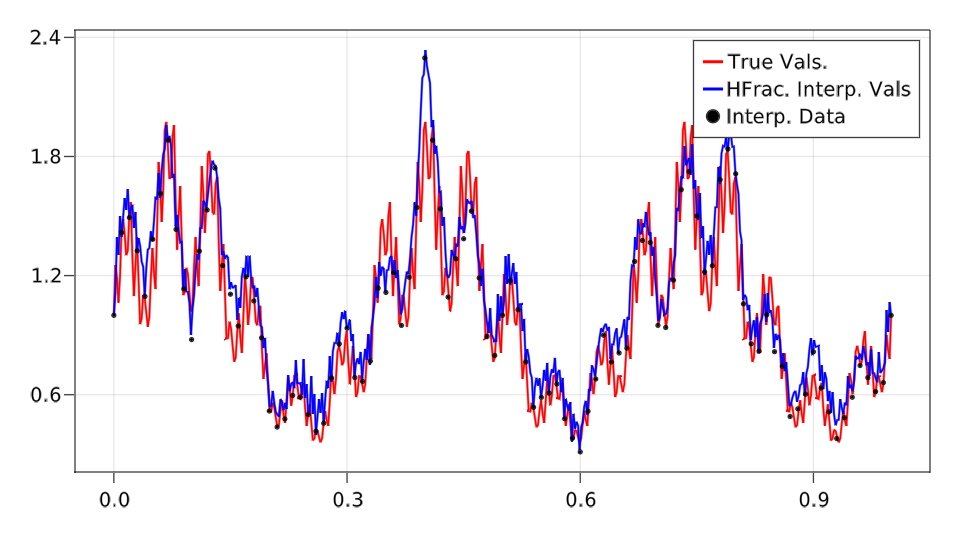

In [14]:
# Load the libraries 
using FractalTools 
using Makie 

# Construct a data set 
npts = 101                           # Number of data samples. 
f(x) = [                            # The function to be sampled for data
    FractalTools.wen(x), 
    FractalTools.parabol(x)
    ]           
domain = [[0.], [1.]]               # Interpolation domaion I = [0, 1]
pts = getdata(f, domain, npts)      # Interpolation data 

# Construct interpolate 
freevar = 0.1                                  # Free variable
interp = interpolate(pts, HInterp1D(freevar * ones(2,2)), niter=20)    # Interpolant 

# Construct test data 
ntpts = 5 * npts                    # Number of test data
tpts = getdata(domain, ntpts)       # Test data 

# Evaluate the interpolation 
xt = getindex.(tpts, 1)
truevals = getindex.(f.(xt), 1)          # True values 
interpvals = getindex.(interp.(xt), 1)   # Interpolation values 

# Plots 
fig = Figure() 
fig, ax, plt = lines(xt, truevals, linewidth=2, color=:red, label="True Vals.") 
lines!(xt, interpvals, linewidth=2, color=:blue, label="HFrac. Interp. Vals")
scatter!(pts, color=:black, markersize=3, label="Interp. Data")
axislegend(ax)
fig 

### Effect of Free Variable 

The fractal interpolation presents flexibility in data interpolation. Free variables makes this flexibilty available. Thus, one can adjust the free variables so that some certain property(such as the smoothness) of the interpolant can be adjusted. In case of one dimensional fractal interpolation, one can specify a single free variable per transformation. However, hidden fractal interpolation presents much more interpolation flexibility by allowing four free variables per transformation. Let us repeat the previous example but with different free variables. 

In [19]:
# Load the libraries 
using FractalTools 
using Makie 

# Construct a data set 
npts = 101                          # Number of data samples. 
f(x) = [                            # The function to be sampled for data
    FractalTools.sinusoid(x), 
    FractalTools.parabol(x)
    ]           
domain = [[0.], [1.]]               # Interpolation domaion I = [0, 1]
pts = getdata(f, domain, npts)      # Interpolation data 

# Construct interpolate 
freevar = rand(2, 2) * 0.001                       # Free variable
interp = interpolate(pts, HInterp1D(freevar))    # Interpolant 

# Construct test data 
ntpts = 5 * npts                    # Number of test data
tpts = getdata(domain, ntpts)       # Test data 

# Evaluate the interpolation 
xt = getindex.(tpts, 1)
truevals = getindex.(f.(xt), 1)          # True values 
interpvals = getindex.(interp.(xt), 1)   # Interpolation values 

# Plots 
fig = Figure() 
fig, ax, plt = lines(xt, truevals, linewidth=2, color=:red, label="True Vals.") 
lines!(xt, interpvals, linewidth=2, color=:blue, label="HFrac. Interp. Vals")
scatter!(pts, color=:black, markersize=3, label="Interp. Data")
axislegend(ax)
fig 
display(fig)

GLMakie.Screen(...)